<a href="https://colab.research.google.com/github/Madushani-Weerasekara/PyTorch-Linear-Regression/blob/main/pytorch_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# We would like to generate 20 data points
N = 20

# Random data on th X-axes in(-5,5)
x = np.random.random(N)*10-5

# A line plus some noise
y = 0.5*x-1+ np.random.random(N)


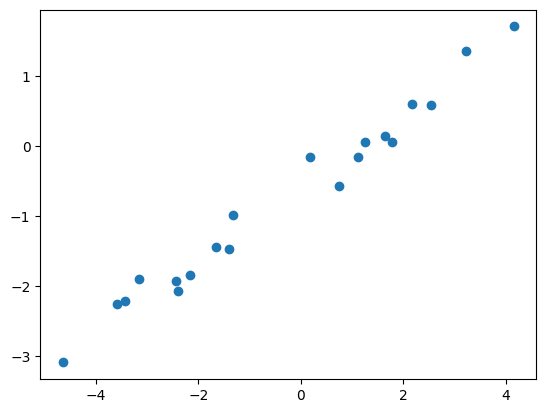

In [ ]:
# Plot the data
plt.scatter(x,y);

In [ ]:
# Create the linear regression model
model = nn.Linear(1,1)

In [ ]:
#Cost/Loss and Optimizer
criterion = nn.MSELoss()
Optimizer = torch.optim.SGD(model.parameters(),lr=0.1)

In [ ]:
# In ML we want our data to be shape:
# (num_samples x num_dimensions)
x = x.reshape(N,1)
y = y.reshape(N,1)


In [ ]:
# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(x.astype(np.float32))
target = torch.from_numpy(y.astype(np.float32))

In [ ]:
type(inputs)

torch.Tensor

In [ ]:
type(target)

torch.Tensor

In [12]:
# Train the model
n_epochs = 30
losess = []
for it in range(n_epochs):
  # Zero the parameter gradient
  Optimizer.zero_grad()

  # Forwad pass
  outputs = model(inputs)
  loss = criterion(outputs, target)

  # Keep the loss so we can plot it later
  losess.append(loss.item())

  # Backward and optimize
  loss.backward()
  Optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss : {loss.item() : .4f}')



Epoch 1/30, Loss :  1.6515
Epoch 2/30, Loss :  1.3711
Epoch 3/30, Loss :  1.1401
Epoch 4/30, Loss :  0.9498
Epoch 5/30, Loss :  0.7930
Epoch 6/30, Loss :  0.6637
Epoch 7/30, Loss :  0.5572
Epoch 8/30, Loss :  0.4693
Epoch 9/30, Loss :  0.3969
Epoch 10/30, Loss :  0.3372
Epoch 11/30, Loss :  0.2879
Epoch 12/30, Loss :  0.2473
Epoch 13/30, Loss :  0.2138
Epoch 14/30, Loss :  0.1862
Epoch 15/30, Loss :  0.1634
Epoch 16/30, Loss :  0.1447
Epoch 17/30, Loss :  0.1292
Epoch 18/30, Loss :  0.1164
Epoch 19/30, Loss :  0.1058
Epoch 20/30, Loss :  0.0972
Epoch 21/30, Loss :  0.0900
Epoch 22/30, Loss :  0.0841
Epoch 23/30, Loss :  0.0792
Epoch 24/30, Loss :  0.0752
Epoch 25/30, Loss :  0.0719
Epoch 26/30, Loss :  0.0691
Epoch 27/30, Loss :  0.0669
Epoch 28/30, Loss :  0.0650
Epoch 29/30, Loss :  0.0635
Epoch 30/30, Loss :  0.0622
